In [17]:
import os
import csv
from pathlib import Path
import pandas as pd
from PIL import Image
from IPython.display import display

In [18]:
## Definitions CHANGE THIS!!
threshold = 0.7
dir_txt = '/media/magalhaes/output/test/data_schreder-split1_night/2022_12_21-11_42_15-0.61/labels'

In [19]:
## import files txt
def convert_to_csv(path_txt):
    list_txt = os.listdir(path_txt)
    path_csv = path_txt + '.csv'
    with open(Path(path_csv), mode='w') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow(['Image', 'class', 'x', 'y', 'w', 'h', 'confidence'])

        for txt_name in list_txt:
            txt = path_txt + '/' + txt_name
            if os.path.isfile(txt):
                file1 = open(txt, 'r')
                Lines = file1.readlines()
                
                # Strips the line
                for line in Lines:
                    linha = line.strip()
                    classe = linha.split(' ')[0]
                    x = linha.split(' ')[1]
                    y = linha.split(' ')[2]
                    w = linha.split(' ')[3]
                    h = linha.split(' ')[4]
                    confidence = linha.split(' ')[5]

                    csv_writer.writerow([txt_name, classe, x, y, w, h, confidence])
    return path_csv

In [20]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [21]:
def show_image(image_name, root):
    image_path = find(image_name, root)

    display(Image.open(image_path))

In [22]:
def show_worst_images(path_csv):
    df=pd.read_csv(path_csv)

    df = df.sort_values(by='confidence')

    for ind in df.index:
        while df['confidence'][ind] < threshold:
            print(df['Image'][ind], 'class:', df['class'][ind], 'confidence:', df['confidence'][ind], '\n')
            show_image(str(Path(df['Image'][ind]).with_suffix('.jpg')), '/media/magalhaes')
            break



In [23]:
csv = convert_to_csv(dir_txt)

d2_2919_2791.txt class: 2 confidence: 0.619629 



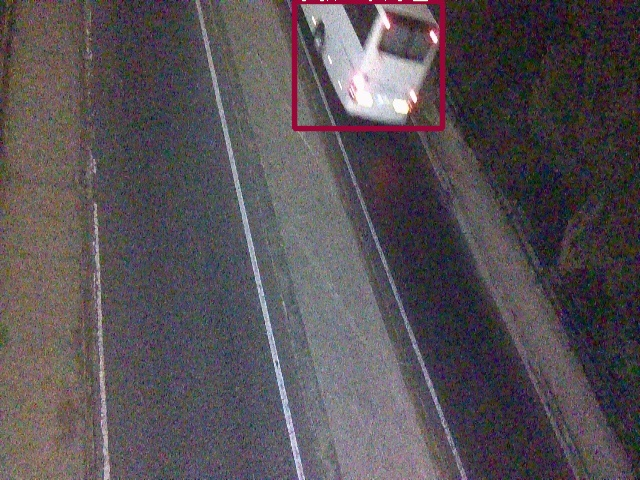

d1_3008_7714.txt class: 2 confidence: 0.664062 



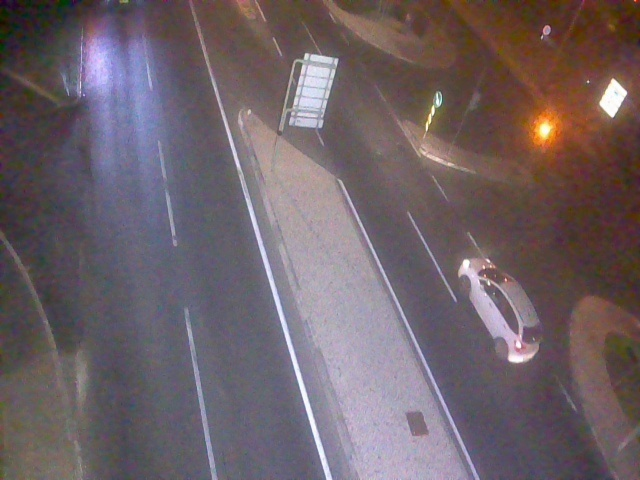

d1_2218_30601.txt class: 7 confidence: 0.697266 



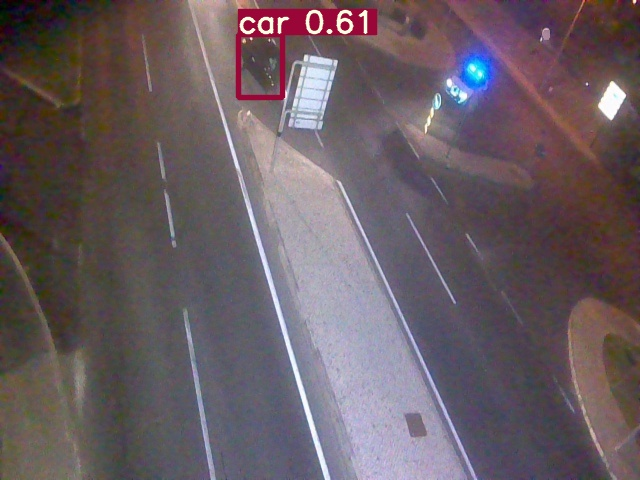

d2_2919_2791.txt class: 5 confidence: 0.699219 



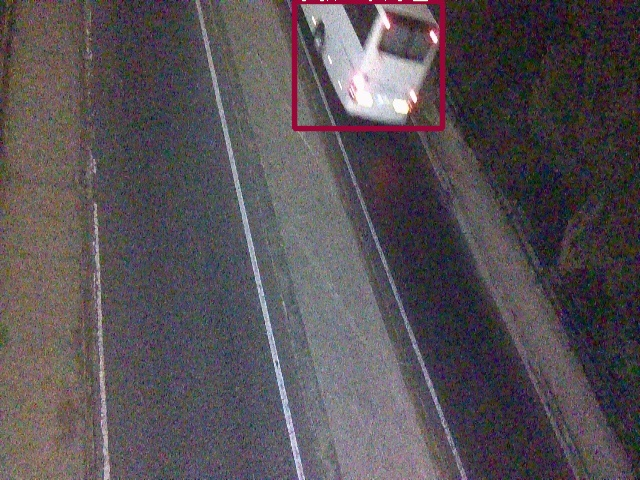

In [24]:
## Print worst image and reference the line

show_worst_images(csv)